In [1]:
# 히스토그램을 출력하기 위해 보통 matplotlib 패키지를 이용한다
# 최근 matplotlib을 기반으로 하는 파이썬 시각화 라이브러리인 seaborn을 이용하여
# 가독성이 좋은 디자인의 표/그래프를 출력할 수 있다

In [2]:
import warnings
warnings.filterwarnings(action='ignore') # 경고창 무시

In [3]:
# matplotlib을 이용한 히스토그램
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mydata = pd.read_csv("../mydata.csv")

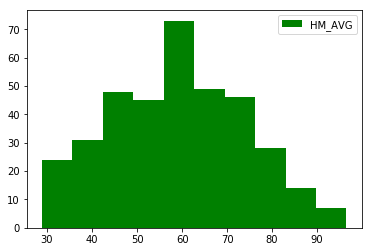

In [5]:
plt.hist(mydata.HM_AVG, # HM_AVG: 평균 상대습도
         color='g', # histogram의 색상
         label='HM_AVG'
        )
plt.legend() # 범례 생성

In [6]:
# seaborn를 이용한 히스토그램
import seaborn as sns
import matplotlib.pyplot as plt

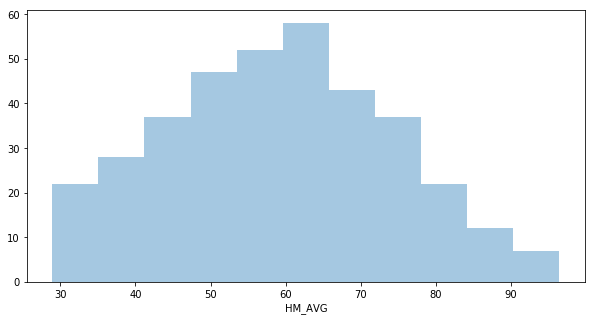

In [7]:
plt.figure(figsize=(10,5))
sns.distplot(mydata.HM_AVG, # 그래프를 그릴 데이터
             kde = False # kde: 가우시안 확률밀도 여부
             )

In [8]:
# 데이터의 기본적인 통계량은 numpy, pandas, scipy 패키지를 이용해 출력할 수 있다

In [9]:
# numpy를 이용한 기술통계 분석

In [10]:
import numpy as np

In [11]:
np.var(mydata) # 데이터에 있는 모든 변수의 결과

TM        119026.300965
CA_TOT         9.377751
HM_AVG       223.598701
RN_DAY        79.384065
dtype: float64

In [12]:
np.mean(mydata['TM']) # TM의 평균

20150668.32328767

In [13]:
# pandas를 이용한 기술통계 분석

In [14]:
s = pd.DataFrame(mydata)
s.describe()

,TM,CA_TOT,HM_AVG,RN_DAY
count,3.650000e+02,365.000000,365.000000,365.000000
mean,2.015067e+07,5.098356,59.019178,-3.671507
std,3.454755e+02,3.066515,14.973743,8.922004
min,2.015010e+07,0.000000,28.900000,-9.000000
25%,2.015040e+07,2.600000,48.000000,-9.000000
50%,2.015070e+07,5.000000,59.400000,-9.000000
75%,2.015100e+07,7.800000,70.000000,0.500000
max,2.015123e+07,10.000000,96.500000,45.500000


In [15]:
# Scipy를 이용한 기술통계분석
# Scipy: 과학기술계산을 위한 Python 라이브러리

In [16]:
import scipy as sp

In [17]:
sp.stats.describe(mydata)

DescribeResult(nobs=365, minmax=(array([ 2.0150101e+07,  0.0000000e+00,  2.8900000e+01, -9.0000000e+00]), array([2.0151231e+07, 1.0000000e+01, 9.6500000e+01, 4.5500000e+01])), mean=array([ 2.01506683e+07,  5.09835616e+00,  5.90191781e+01, -3.67150685e+00]), variance=array([1.19353296e+05, 9.40351377e+00, 2.24212983e+02, 7.96021529e+01]), skewness=array([-0.01069441, -0.04127374,  0.08465603,  2.34500701]), kurtosis=array([-1.20571404, -1.16737904, -0.60915828,  7.10336469]))

In [18]:
# Box plot: 자료로부터 얻어낸 통계량인 5가지 요약 수치
# (다섯 숫자 요약, five-number summary)를 가지고 그린다.
# 이 때 5가지 요약 수치란 최솟값, 제 1사분위({\displaystyle Q_{1}}Q_{1}), 
# 제 2사분위({\displaystyle Q_{2}}Q_{2}),
# 제 3사분위({\displaystyle Q_{3}}{\displaystyle Q_{3}}),최댓값을 일컫는 말이다.
# 히스토그램과는 다르게 집단이 여러개인 경우에도 한 공간에 수월하게 나타낼수 있다.

In [19]:
# matplotlib을 이용한 Box plot

([<matplotlib.axis.XTick at 0x1f69eeecb38>],
 <a list of 1 Text xticklabel objects>)

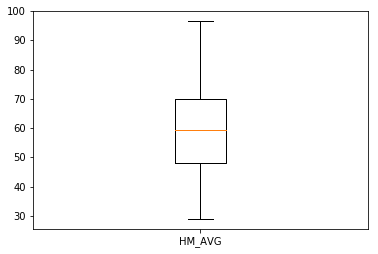

In [20]:
plt.boxplot(mydata.HM_AVG)
plt.xticks([1],['HM_AVG'])

In [21]:
# 상관분석 결과를 출력하기 위해 numpy 패키지와 pandas 패키지를 이용한다

In [22]:
# numpy를 이용한 상관분석
a = np.array([1,2,3,4,5])
b = np.array([3,2,3,1,2])

np.corrcoef(a,b)

array([[ 1.        , -0.56694671],
       [-0.56694671,  1.        ]])

In [23]:
# pandas를 이용한 상관분석
x = mydata.iloc[:,1:4]
x.corr(method='pearson')

,CA_TOT,HM_AVG,RN_DAY
CA_TOT,1.000000,0.665570,0.561871
HM_AVG,0.665570,1.000000,0.591783
RN_DAY,0.561871,0.591783,1.000000


In [24]:
# 피어슨 상관 계수(Pearson correlation coefficient)
# 상관관계 분석에서
# 두 변수 간의 관련성을 구하기 위해 보편적으로 피어슨 상관계수를 이용한다
# 정의
# r = x와 y가 함께 변하는 정도 / x와 y가 각각 변하는 정도
# r갑                         관계
# +0.7 ~ +1.0                 강한 양적 상관관계
# +0.3 ~ +0.7                 뚜렷한 양적 상관관계
# +0.1 ~ +0.3                 약한 양적 상관관계
# -0.1 ~ +0.1                 상관관계 거의 없음
# -0.3 ~ -0.1                 약한 음적 상관관계
# -0.7 ~ -0.3                 뚜렷한 음적 상관관계
# -1.0 ~ -0.7                 강한 음적 상관관계

In [25]:
# 산점도를 출력하기 위해 matplotlib패키지의 pyplot 모듈을 이용한다
# 산점도 옵션                   설명
# label                         그래프 레이블을 입력
# size                          도형의 크기를 입력
# alpha                         도형 색상의 투명도 입력(0: 투명, 1: 불투명)
# color                         그래프에 이용할 색상 입력
# marker                        표시할 도형 종류 입력

Text(0,0.5,'CA_TOT')

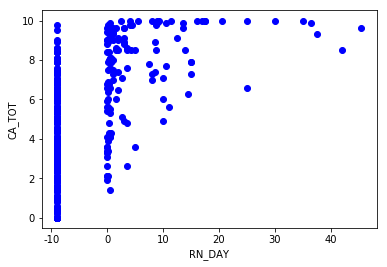

In [26]:
plt.scatter(mydata['RN_DAY'], # x축 데이터(강수량)
            mydata['CA_TOT'], # y축 데이터(전운량)
            color='b', # 색상
            marker='o'  # 표시할 도형 종류
            )
plt.xlabel('RN_DAY'), # x축 라벨
plt.ylabel('CA_TOT') # y축 라벨

In [27]:
# 데이터 탐색 및 전처리 시 유용한 기타 파이썬 코드

In [28]:
# 상위 또는 하위 행 선택해 출력하기

In [29]:
print(mydata.head()) # 상위행 보기
print("--------------------------------------")
print(mydata.tail()) # 하위행 보기

         TM  CA_TOT  HM_AVG  RN_DAY
0  20150101     3.4    51.1     0.1
1  20150102     3.1    53.6     0.0
2  20150103     3.7    59.6    -9.0
3  20150104     3.1    68.8    -9.0
4  20150105     6.5    79.4     2.0
--------------------------------------
           TM  CA_TOT  HM_AVG  RN_DAY
360  20151227     0.0    40.6    -9.0
361  20151228     2.1    36.5    -9.0
362  20151229     3.0    47.3    -9.0
363  20151230     4.3    61.0     0.6
364  20151231     4.0    72.3    -9.0


In [30]:
# 결측값 처리

In [31]:
# mydata.fillna(999) : 데이터에서 결측값 999로 치환
# mydata.dropna() : 데이터에서 결측값 제외
# mydata.isnull() : 데이터에서 결측인지
# mydata.notnull() : 데이터에서 결측이 아닌지

In [32]:
# 데이터 타입 변환
mydata["TM"].dtypes

dtype('int64')

In [33]:
mydata["TM"] = mydata["TM"].astype('category')
mydata["TM"].dtypes

CategoricalDtype(categories=[20150101, 20150102, 20150103, 20150104, 20150105, 20150106,
                  20150107, 20150108, 20150109, 20150110,
                  ...
                  20151222, 20151223, 20151224, 20151225, 20151226, 20151227,
                  20151228, 20151229, 20151230, 20151231],
                 ordered=False)

In [34]:
mydata["TM"] = mydata["TM"].astype('int64')
mydata["TM"].dtypes

dtype('int64')

In [35]:
# 선형, 누적, 바 그래프

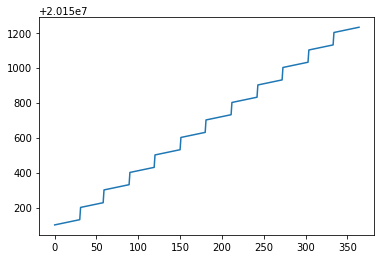

In [36]:
mydata.TM.plot.line() # 선형

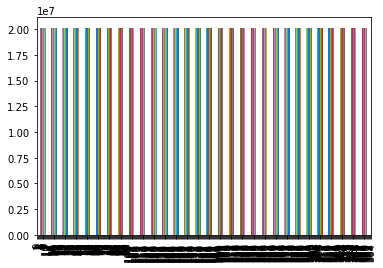

In [37]:
mydata.TM.plot.bar() # 바

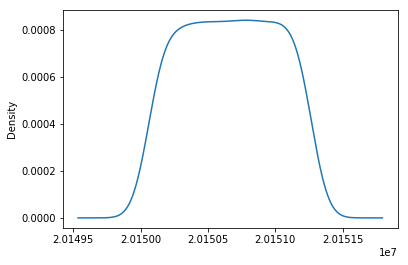

In [38]:
mydata.TM.plot.density() # 누적

In [39]:
# 행 병합: pd.concat([데이터명1, 데이터명2], axis=0)
# 열 병합: pd.concat([데이터명1, 데이터명2], axis=1)
# 데이터 병합: pd.merge(왼쪽 위치 데이터명, 오른쪽 위치 데이터명,
# on=‘고유키',how="left")
# how 옵션 종류: left, right, outer, inner
# 특정 조건에 따른 데이터 병합
# 데이터명[“생성할 컬럼명"] = np.where(데이터명['참조 컬럼명'] == 조건 값,
# 'True일 경우 값','False일 경우 값')